# Encoding (Label encoding and One-hot encoding)


## G Prashant (BS17B011)

These are simple exercises useful for notebook 2

In [226]:
import pandas as pd

Open 'grades.csv' and use appropriate encoding technique to convert to numerical data

In [227]:
df = pd.read_csv("files/grades.csv")

In [228]:
df["Grades"].unique()

array(['A', 'S', 'C', 'F', 'E', 'B'], dtype=object)

As we can see, there are 6 unique grades - S, A, B, C, E, F
According to IITMs grading system, the grades are S, A, B, C, D, E, F: ordered from the first priority (1) to the last priority (7) - based on rank 1 to 7

In [229]:
# write a function to do Label encoding
def label_encoding(column):
    grades = {"S":1,"A":2,"B":3,"C":4,"D":5,"E":6,"F":7}
    n = len(column)
    Labeled_data = pd.Series([0]*10,name="Grades")
    for i in range(n):
        Labeled_data[i] = grades[column[i]]
    return Labeled_data
grades_labeled = label_encoding(df["Grades"])
df["Grades"] = grades_labeled

In [230]:
#Dataframe with grades label encoded
df

,Name,Grades
0,Nilesh,2
1,Jhon,1
2,James,4
3,Ravi,7
4,Sita,1
5,Raju,6
6,Praful,7
7,Ganga,3
8,Ram,2
9,Rahim,1


Open 'colors.csv' and use appropriate encoding technique to convert to numerical data

In [231]:
df = pd.read_csv("files/color.csv")

Hint : you can achieve using pandas (no need for sklearn) check the documentation

In [232]:
# One-hot encoding features - object and colors
df_one_hot = pd.concat([pd.get_dummies(df.Objects),pd.get_dummies(df.Color)],axis=1)

In [233]:
#Dataframe with Object and Color one-hot encoded
print("Numerically encoded data")
df_one_hot

Numerically encoded data


,Apple,Banana,Blood,Leaves,Mango,Rose,Sea,Sun flower,Blue,Green,Red,Yellow
0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1
5,1,0,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,1,0,0,0,0,0,0,1
7,0,1,0,0,0,0,0,0,0,0,0,1


Answer the following for both the data 

- What are the categories in the data?
- what is the relationship between different categories in the grades column?
- Which encoding to be used Label encoding or one-hot encoding?


Note: If there is need of any assumption on grades assume grades follow pattern as it is in IIT M


There is one ordinal categorical feature in the "grades.csv" data, which is:
- Grades: It specifies the grade acquired by each individual, which is represented by a single letter (S,A,B,C,D,E,F)

There are two nominal categorical features in the "colors.csv" data 
- Objects: It specifies an object (eg: Leaves, Blood, Sea, etc.)
- Color: It specifies the color of the object (eg: Green, Red, Blue, etc.)

The "Grades" column in the "grades.csv" represents ordinal categorical feature. The grades S, A, B, C, E, F has clear ordering where any one grade is either better or worse than another. The highest to lowest ordering of grades is as follows:

S>A>B>C>D>E>F

For categorical variables in dataset "grades.csv", label encoding is preferred, as grades represent oordinal data and there is an implicit ordering of the different categories of grades (S>A>B>C>D>E>F). 

On the other hand, the features "Object", "Color", of "color.csv" are nominal variables that do not have any implicit ordering of the different categories. Hence, one-hot encoding is more suitable in this case, where every unique value in the feature, is a added as an additional binary feature in the encoded data.

# Regularized Least Squares

## Ridge Regression 

$$\hat{\theta} = argmin_{\theta}((y - X\theta)^\top(y - X\theta) + \lambda \theta^\top \theta)$$





Complete the following functions for ridge rigression using gradient descent (without sklearn)  

- You can reuse the functions you have written in last week
- Also you need to change gradient and cost accordingly

Hint: If you use numpy for gradient calculation for theta, you may have to flatten the numpy array

In [234]:
def computeCost(X, y, theta,lamda):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : with n features
    
    y : with (len(X),1)
    theta : array_like -> The parameters for the regression function. This is a vector of 
        shape (n+1, 1).
    
    Returns
    -------
    J : float -> The value of the regression cost function.
    
    """
    # You need to return the following variables correctly
    m = X.shape[0]
    #Cost function expression - Each term is divided by 2m to improve stability
    J = (np.sum((np.dot(X,theta)-y)**2))/(2*m)+(lamda*np.dot(theta.T,theta))/(2*m)
    
    return J

In [235]:
def gradientDescent(X_appended, y, theta, alpha, lamda=10,max_iters= 1000):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : with n degree polynomial features 
    
    y : array with shape of (len(X), 1)
    
    theta : array with shape of (n+1,1)
    
    alpha : float value, called as "learning rate"
    
    max_iters: maximum no of iteration
    
    Returns
    -------
    theta : array wih shape of (n,1),The learned linear regression parameters
    
    J_history : A python list for the values of the cost function after every iteration. This is to check for convergence
    
    
    Hint: 
    ------------
    1. Peform a single gradient step on the parameter vector theta.
    2. Loop over the number of iterations to update step by step.
    """
    # Initialize some useful values
    J_history = [np.inf]
    count = 0
    cost = 0
    m = X_appended.shape[0]
    
    #Derivative of cost function
    diff_cost = lambda y_cap,y,x,theta,lamda,m: (1/m)*(np.dot((y_cap - y).T,x)).T + (1/m)*lamda*theta
    precision = 10**(-6)
    while abs(J_history[-1]-cost)>precision:
        if J_history[0]==np.inf:
            del J_history[0]
        J_history.append(cost)
        y_pred = np.dot(X_appended,theta)
        #Calculating Cost function
        cost = computeCost(X_appended, y, theta,lamda)
        #Updating Parameters
        theta -= alpha*diff_cost(y_pred,y,X_appended,theta,lamda,m)
        #Number of iterations
        count += 1
    
    del J_history[0]
    J_history.append(cost)
    
    return theta, J_history

Load "dataWeek4Train.npz" for training the model and "dataWeek4Test.npz" for validating ridge rigression

Note: use np.load()

In [236]:
import numpy as np
from matplotlib import pyplot as plt
#importing training data
data_train = np.load("files/dataWeek4Train.npz")
#importing test data
data_test = np.load("files/dataWeek4Test.npz")

Using functions written above try to fit the data with polynomial of degree 3 and 
 
- plot the fit on train data, for $\lambda$ = [0,100,10000] 

- take learning rate (here it is alpha) 0.0001, 
- max_iters as 1000 (you can change if you wish)

- Write comment how the fit changes as lambda and what is the reason?

In [237]:
# Write you code Here
X_train = data_train["X_train"].reshape(-1,1)   #training feature data
y_train = data_train["y_train"].reshape(-1,1)   #training labels

X_test = data_test["X_test"].reshape(-1,1)      #test feature data
y_test = data_test["y_test"].reshape(-1,1)      #test labels   

m = len(X_train)

#Transforming into cubic polynomial
X_train_app = np.append(np.ones((m,1)),X_train,axis=1)
x_plot = np.linspace(min(X_train),max(X_train),1000).reshape(-1,1)
x_plot = np.append(np.ones((1000,1)),x_plot,axis = 1)
for i in range(2,4):
    X_train_app = np.append(X_train_app,X_train_app[:,1].reshape(-1,1)**i,axis=1)
    x_plot = np.append(x_plot,x_plot[:,1].reshape(-1,1)**i,axis=1)

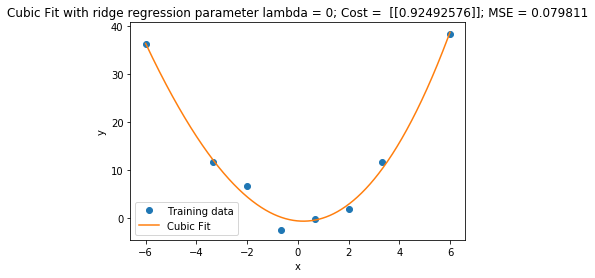

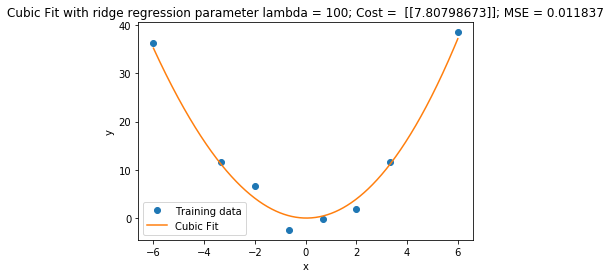

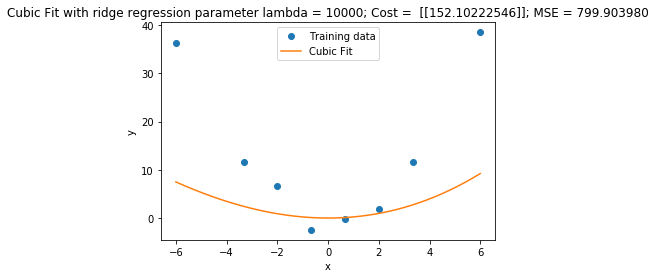

In [238]:
#Training model with train data
lam_values = [0,100,10000]
alpha = 0.0001
theta_list = []
for lamda in lam_values:
    #Training model
    theta = np.array([0]*4).reshape(-1,1).astype(float)
    theta, J_history = gradientDescent(X_train_app, y_train, theta, alpha, lamda, max_iters = 10000)
    theta_list.append(theta)
    #Calculating mse
    m = X_train.shape[0]
    mse = (np.sum(np.dot(X_train_app,theta)-y_train)**2)/m
    
    #Plotting
    plt.figure()
    plt.plot(X_train,y_train,"o")
    plt.plot(x_plot[:,1],np.dot(x_plot,theta),"-")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(["Training data","Cubic Fit"])
    plt.title("Cubic Fit with ridge regression parameter lambda = "+str(lamda)+"; Cost =  "+str(J_history[-1])+"; MSE = %f"%mse)

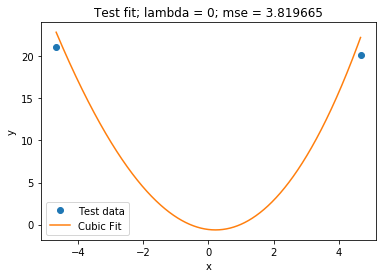

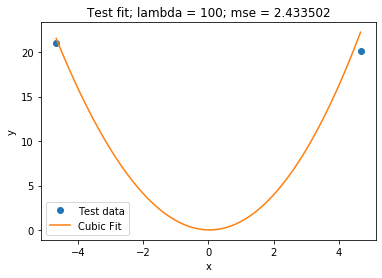

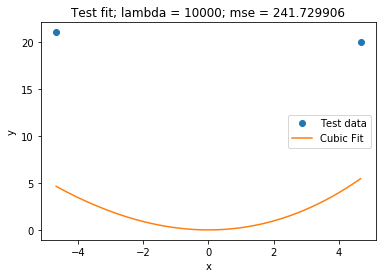

In [239]:
#Validating with test/validation data
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)

X_test_app = poly.fit_transform(X_test)
x_plot_test = np.linspace(min(X_test),max(X_test),1000).reshape(-1,1)
x_plot_test = poly.fit_transform(x_plot_test)
m_test = X_test.shape[0]
for i in range(3):
    plt.figure()
    plt.plot(X_test,y_test,"o")
    y_pred = np.dot(X_test_app,theta_list[i])
    plt.plot(x_plot_test[:,1],np.dot(x_plot_test,theta_list[i]),"-")
    plt.legend(["Test data","Cubic Fit"])
    mse = np.sum((y_pred-y_test)**2)/m_test
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Test fit; lambda = "+str(lam_values[i])+"; mse = %f"%mse)
    

Use same data "dataWeek4Train.npz" for training the model and "dataWeek4Test.npz" for validating the model for all three models4

In the following exercises you can use inbuilt regressionn functions from sklearn

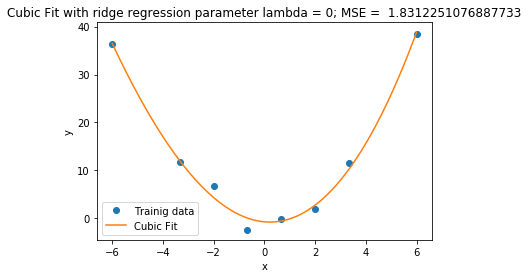

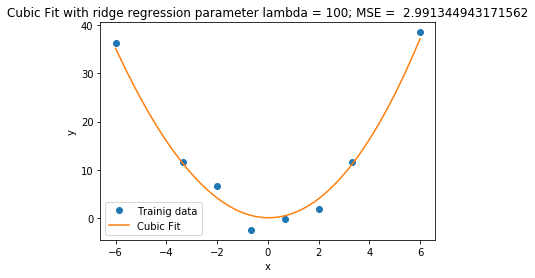

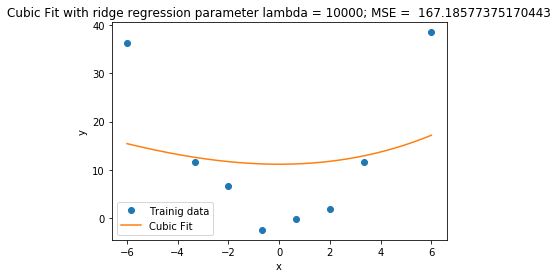

In [240]:
#Training with sklearn Ridge Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)

theta_sk_list = []
for lamda in lam_values:
    #Training model using sci-kit learn's ridge regression
    clf = Ridge(alpha=lamda)
    clf.fit(X_train_poly[:,1:],y_train)
    #Calculating MSE
    y_pred = clf.predict(X_train_poly[:,1:])
    m = len(X_train)
    mse = np.sum((y_pred-y_train)**2)/m
    #Plotting Training data fits
    plt.figure()
    plt.plot(X_train,y_train,"o")
    plt.plot(x_plot[:,1],clf.predict(x_plot[:,1:]),"-")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(["Trainig data","Cubic Fit"])
    theta_sk = np.append(clf.intercept_,clf.coef_).reshape(-1,1)
    theta_sk_list.append(theta_sk)
    plt.title("Cubic Fit with ridge regression parameter lambda = "+str(lamda)+"; MSE =  "+str(mse))

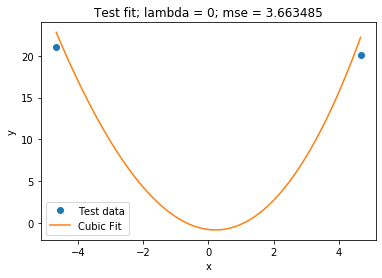

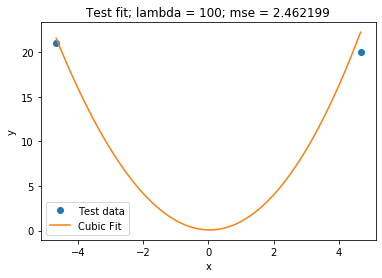

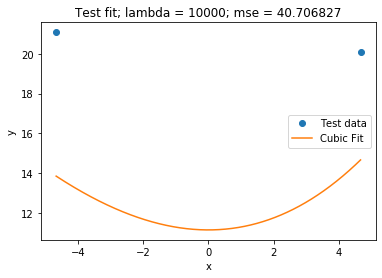

In [241]:
#validating sklearn model with test/validation data
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)

X_test_app = poly.fit_transform(X_test)
x_plot_test = np.linspace(min(X_test),max(X_test),1000).reshape(-1,1)
x_plot_test = poly.fit_transform(x_plot_test)
m_test = X_test.shape[0]
for i in range(3):
    plt.figure()
    plt.plot(X_test,y_test,"o")
    y_pred = np.dot(X_test_app,theta_sk_list[i])
    plt.plot(x_plot_test[:,1],np.dot(x_plot_test,theta_sk_list[i]),"-")
    plt.legend(["Test data","Cubic Fit"])
    mse = np.sum((y_pred-y_test)**2)/m_test
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Test fit; lambda = "+str(lam_values[i])+"; mse = %f"%mse)
    

In [242]:
#Coefficients with manual ridge regression
print("Without sklearn - Manual Code\n")
for i in range(3):
    print("Estimated parameters for lambda = " + str(lam_values[i]))
    print(theta_list[i],end= "\n\n")

Without sklearn - Manual Code

Estimated parameters for lambda = 0
[[-0.57508715]
 [-0.46662644]
 [ 1.06071513]
 [ 0.01836006]]

Estimated parameters for lambda = 100
[[ 0.00694234]
 [-0.063229  ]
 [ 1.0048238 ]
 [ 0.00631093]]

Estimated parameters for lambda = 10000
[[ 0.00799803]
 [-0.00069125]
 [ 0.23191081]
 [ 0.00403164]]



In [243]:
#Coefficients with sklearn ridge regression
print("Using sklearn\n")
for i in range(3):
    print("Estimated parameters for lambda = " + str(lam_values[i]))
    print(theta_sk_list[i],end= "\n\n")

Using sklearn

Estimated parameters for lambda = 0
[[-0.76127513]
 [-0.46791175]
 [ 1.06741131]
 [ 0.01839844]]

Estimated parameters for lambda = 100
[[ 0.07642626]
 [-0.0691705 ]
 [ 1.00241723]
 [ 0.00648833]]

Estimated parameters for lambda = 10000
[[ 1.11581176e+01]
 [-6.92409899e-04]
 [ 1.42630833e-01]
 [ 4.03167672e-03]]



The values of the predicted parameters determined by sklearn and manual code are almost the same for all values of lambda. Except when lambda = 10000, the bias term and the coefficient of the quadratic term predicted using sklearn are not very close to those predicted using manual code.

**As the value of lambda increases, the value of mean-squared error (MSE) increases, thereby resulting in poorer fitting of training data (underfitting in extreme cases - high lambda). Higher values of lambda force the optimisation algorithm to minimise the regularising term, which results in decaying of parameters, leading to more simpler models**

##  Linear Regression (Recap)


Write a generic function decribed in the following cell which takes in data, regression type - lasso,ridge and usual linear , degree of the polynomial and then the alpha values (which are regularization parameters -lambda $\lambda$ , in sklearn they are named as alpha so its just a notaitonal difference).



Hint: Use PolynomialFeatures from sklearn and set bias to Flase

Use 9 degree polynomial features to fit the data using Linear Rigression. Comment on the fit of the model (Overfit, underfit, perfect fit) and also plot prediction on training data along with ground truth

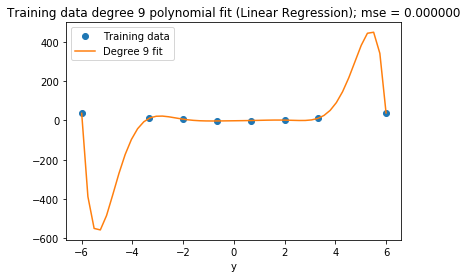

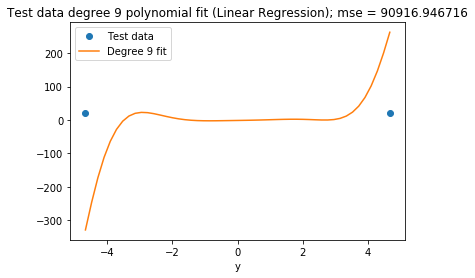

In [260]:
''' Import neccessay packages '''
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

def regression(X,Y,reg_type ="ridge",degree = 9,alpha=0.1 ):
    ''' 
    Write a function which takes data X,Y
    Type of regression - usual linear , ridge , lasso
    Degree of polynomial features - here it is 10
    Regularization parameter alpha 
    Return predicted output Y hat, Mean square error , regression object
    '''
    poly = PolynomialFeatures(degree,include_bias = False)
    X_poly = poly.fit_transform(X)
    m = X.shape[0]
    
    if reg_type == "linear":  #Usual Linear Regression
        reg = LinearRegression()
        reg.fit(X_poly,Y)
        Y_hat = reg.predict(X_poly).reshape(-1,1)
        mse = np.sum((Y_hat-Y)**2)/m
        
    elif reg_type == "ridge":   #Ridge Regression
        reg = Ridge(alpha=alpha,max_iter=10**6) 
        reg.fit(X_poly,Y)
        Y_hat = reg.predict(X_poly).reshape(-1,1)
        mse = np.sum((Y_hat-Y)**2)/m
        
    elif reg_type == "lasso":   #Lasso Regression
        reg = Lasso(alpha=alpha,max_iter=10**6)
        reg.fit(X_poly,Y)
        Y_hat = reg.predict(X_poly).reshape(-1,1)
        mse = np.sum((Y_hat-Y)**2)/m
    else:      #Default
        raise("Not Valid")
    return Y_hat, mse , reg

# Plotting and calling the function
Y_hat, mse_train , reg = regression(X_train,y_train,reg_type ="linear",degree = 9)


#Plotting fit with training dataset
plt.figure()
plt.plot(X_train,y_train,"o")
x_poly_train = np.linspace(min(X_train),max(X_train))
poly = PolynomialFeatures(9,include_bias = False)
x_poly_train = poly.fit_transform(x_poly_train)
plt.plot(x_poly_train[:,0],reg.predict(x_poly_train),"-")
plt.title("Training data degree 9 polynomial fit (Linear Regression); mse = %f"%mse_train)
plt.xlabel("x")
plt.xlabel("y")
plt.legend(["Training data","Degree 9 fit"])


#Plotting fit with test dataset
poly = PolynomialFeatures(9,include_bias = False)
X_test_app = poly.fit_transform(X_test)
plt.figure()
plt.plot(X_test,y_test,"o")
x_poly_test = np.linspace(min(X_test),max(X_test))
poly = PolynomialFeatures(9,include_bias = False)
x_poly_test = poly.fit_transform(x_poly_test)
mse_test = np.sum((reg.predict(X_test_app)-y_test)**2)/X_test.shape[0]
plt.plot(x_poly_test[:,0],reg.predict(x_poly_test),"-")
plt.title("Test data degree 9 polynomial fit (Linear Regression); mse = %f"%mse_test)
plt.xlabel("x")
plt.xlabel("y")
plt.legend(["Test data","Degree 9 fit"])


**As can be seen above, the model overfits the data as the training error 0, with all training data points passing through the curve, while the test/validation mse is very high.**

## Ridge Rigression and Lasso for polynomial fitting with degree 9
In previous you observed that how the model has fit the training data, now try the same thing using regularization both Ridge and Lasso. Use the generic function that you wrote in previous cell.

 - Now use polynomial regression of order 9 along with Ridge regression and Lasso regression on "dataWeek4Train.npz" for $\lambda= [0, 1, 10^5, 10^{10}]$ and plot the true vs predicted values for each $\lambda$ (Note here that in sklearn lambda is alpha)

- Plot the prediction on training data along with ground truth for various values of $\lambda$ for both ridge and lasso. And also print the coefficients of model for each $\lambda$

- Also plot trainning error vs $\lambda$

Note : Here you can use ridge Rigression from sklearn and also set bias to False in polynomial features  
- You can use library to generate polynomial features


### Lasso Regression

$$\hat{\theta} = argmin_{\theta}(\frac{1}{2} \sum_{i=1}^{N} (y_i-\theta_0-\sum_{j=1}^p x_{ij}\theta_j)^2 + \lambda \sum_{j=1}^{p}|\theta_j|)$$

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.00612751771637, tolerance: 0.17776156780405505
  positive)


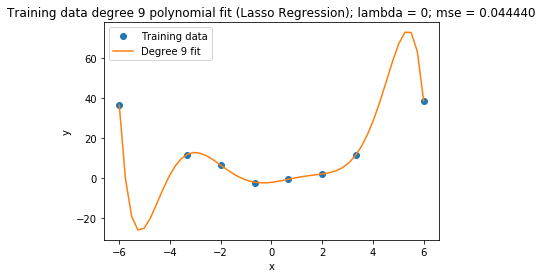

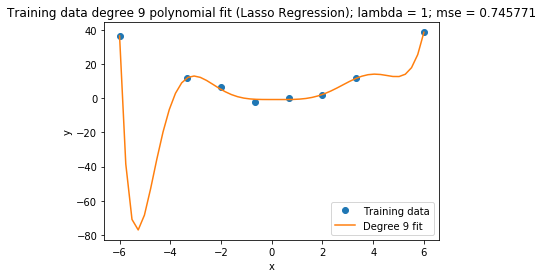

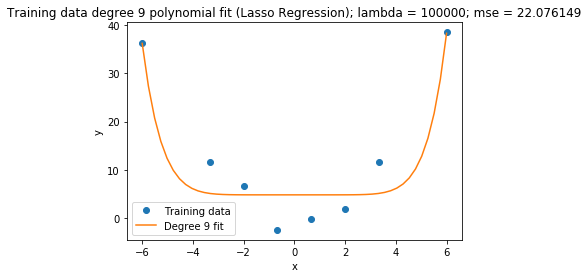

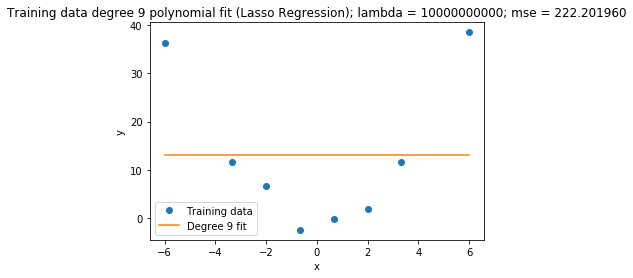

In [261]:
#Using Lasso Regression to training dataset
lam_vals = [0,1,10**5,10**10]
mse_lasso = []

lasso_list = []

for lamda in lam_vals:
    Y_hat, mse_train , reg_lasso = regression(X_train,y_train,reg_type ="lasso",degree = 9,alpha=lamda)
    mse_lasso.append(mse_train)
    lasso_list.append(reg_lasso)
    
    x_poly_train = np.linspace(min(X_train),max(X_train))
    x_poly_train = poly.fit_transform(x_poly_train)
    
    #Plots
    plt.figure()
    plt.plot(X_train,y_train,"o")
    plt.plot(x_poly_train[:,0],reg_lasso.predict(x_poly_train),"-")
    plt.title("Training data degree 9 polynomial fit (Lasso Regression); lambda = %d"%lamda + "; mse = %f"%mse_train)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(["Training data","Degree 9 fit"])

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.04135e-17): result may not be accurate.
  overwrite_a=False)


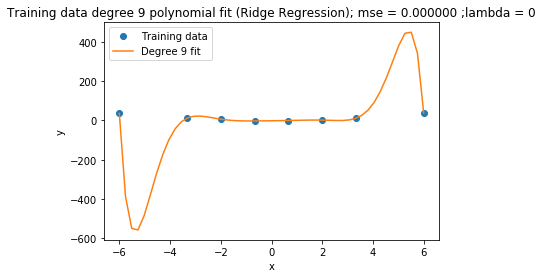

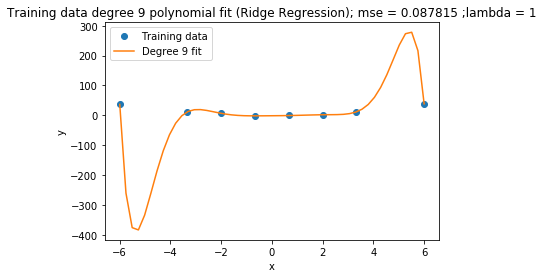

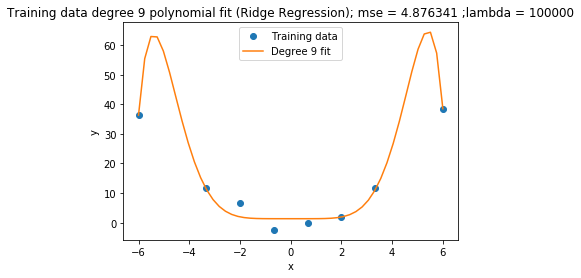

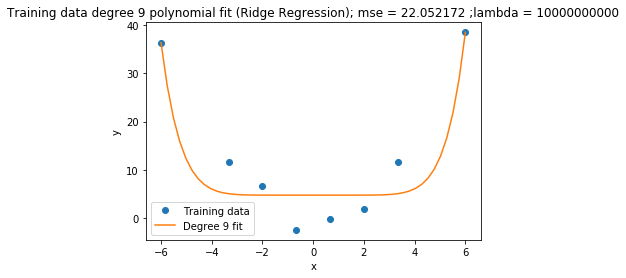

In [262]:
#Using Ridge Regression to training dataset
mse_ridge = []  
ridge_list = []
for lamda in lam_vals:
    Y_hat, mse_train , reg_ridge = regression(X_train,y_train,reg_type ="ridge",degree = 9,alpha=lamda)
    mse_ridge.append(mse_train)
    ridge_list.append(reg_ridge)
    
    x_poly_train = np.linspace(min(X_train),max(X_train))
    x_poly_train = poly.fit_transform(x_poly_train)
    
    plt.figure()
    plt.plot(X_train,y_train,"o")
    plt.plot(x_poly_train[:,0],reg_ridge.predict(x_poly_train),"-")
    plt.title("Training data degree 9 polynomial fit (Ridge Regression); mse = %f"%mse_train +" ;lambda = %d"%lamda)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(["Training data","Degree 9 fit"])
    

Hence, increase in lambda results in simpler models in both Lasso and Ridge regression

NOTE: In both Lasso and Ridge regression, training the model with lambda = 0 is as good as simple linear regression. However, using sklearn's lasso regression with lambda = 0 is not recommended as per the warning

Text(0.5, 1.0, 'Training MSE vs log(Lambda+1) : Lasso')

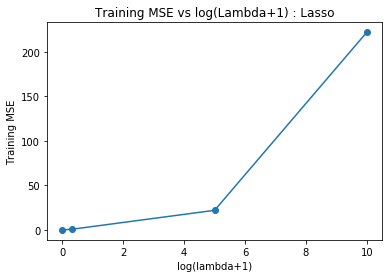

In [263]:
#Generating Training error vs log(lambda+1) plot - Lasso Regression
plt.plot(np.log10(np.array(lam_vals)+1),mse_lasso,"-o")
plt.xlabel("log(lambda+1)")
plt.ylabel("Training MSE")
plt.title("Training MSE vs log(Lambda+1) : Lasso")

Text(0.5, 1.0, 'Training MSE vs log(Lambda+1) : Ridge')

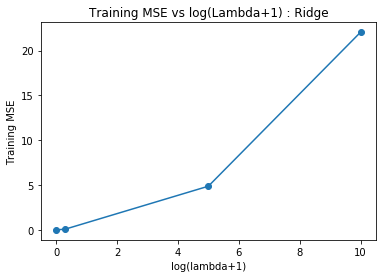

In [264]:
#Generating Training error vs log(lambda+1) plot - Ridge Regression
plt.plot(np.log10(np.array(lam_vals)+1),mse_ridge,"-o")
plt.xlabel("log(lambda+1)")
plt.ylabel("Training MSE")
plt.title("Training MSE vs log(Lambda+1) : Ridge")

## Ridge Rigression and Lasso for polynomial fitting to predict on validation set

Now use "dataWeek4Test.npz" to validate the model for same values of $\lambda$s ($\lambda= [0, 1, 10^5, 10^{10}]$) used in previous case. And plot $\lambda$ vs validation error.  
- Note : No need to plot the prediction on validation set since the validation points are very few
- Print the learned coefficients for Lasso and Ridge rigression and write your observations

Hint: Think of the property of Lasso Rigression (for writing observations)

Text(0.5, 1.0, 'Test MSE vs log(Lambda+1) - Lasso Regression')

<Figure size 432x288 with 0 Axes>

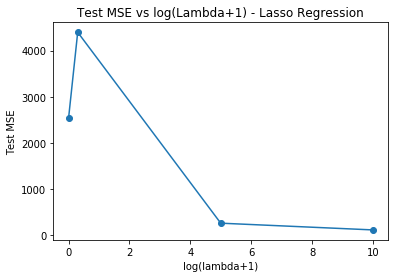

In [265]:
#Generating Test error vs log(lambda+1) plot - Lasso Regression
test_mse_lasso = []
plt.figure()
for i in range(len(lam_vals)):
    test_mse_lasso.append(np.sum((lasso_list[i].predict(X_test_app)-y_test)**2)/X_test.shape[0])
plt.figure()
plt.plot(np.log10(np.array(lam_vals)+1),test_mse_lasso,"-o")
plt.xlabel("log(lambda+1)")
plt.ylabel("Test MSE")
plt.title("Test MSE vs log(Lambda+1) - Lasso Regression")

Text(0.5, 1.0, 'Test MSE vs log(Lambda+1) - Ridge Regression')

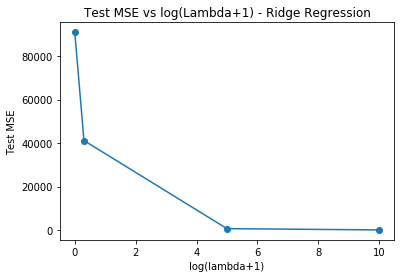

In [266]:
#Generating Test error vs log(lambda+1) plot - Ridge Regression
test_mse_ridge = []
for i in range(len(lam_vals)):
    test_mse_ridge.append(np.sum((ridge_list[i].predict(X_test_app)-y_test)**2)/X_test.shape[0])
plt.plot(np.log10(np.array(lam_vals)+1),test_mse_ridge,"-o")
plt.xlabel("log(lambda+1)")
plt.ylabel("Test MSE")
plt.title("Test MSE vs log(Lambda+1) - Ridge Regression")

In [267]:
#Printing the learned coefficients for Lasso Regression
for i in range(len(lam_vals)):
    print("Lambda = %d"%lam_vals[i])
    print("Coefficients: ")
    print(lasso_list[i].coef_)
    print("Intercept: ")
    print(lasso_list[i].intercept_,end = "\n\n")

Lambda = 0
Coefficients: 
[ 1.53172008e+00  1.83625015e+00 -1.01898536e+00 -6.36281182e-02
  9.51198163e-02  8.02123480e-04 -1.24220805e-03  1.10142796e-05
 -1.78534248e-05]
Intercept: 
[-2.14526819]

Lambda = 1
Coefficients: 
[-0.00000000e+00  0.00000000e+00 -2.22675837e-01  4.05977436e-01
  1.00910726e-03 -3.49402398e-02  2.37180095e-03  6.80084232e-04
 -6.17819854e-05]
Intercept: 
[-0.83433753]

Lambda = 100000
Coefficients: 
[-0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.93067649e-05
  1.03278897e-07]
Intercept: 
[4.81468056]

Lambda = 10000000000
Coefficients: 
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
Intercept: 
[12.99647059]



In [268]:
#Printing the learned coefficients for Ridge Regression
for i in range(len(lam_vals)):
    print("Lambda = %d"%lam_vals[i])
    print("Coefficients: ")
    print(ridge_list[i].coef_)
    print("Intercept: ")
    print(ridge_list[i].intercept_,end = "\n\n")

Lambda = 0
Coefficients: 
[[ 1.55315827e+00  1.60951239e-01  4.42683559e-01  4.86392799e-01
  -4.54839905e-01 -4.55959576e-02  4.68980382e-02  9.10977519e-04
  -9.62072268e-04]]
Intercept: 
[-1.50533287]

Lambda = 1
Coefficients: 
[[ 7.44116435e-01  1.59227497e-01  1.92021948e-01  4.81193528e-01
  -2.78416132e-01 -4.49908395e-02  2.98148846e-02  8.98201036e-04
  -6.17815448e-04]]
Intercept: 
[-1.4779386]

Lambda = 100000
Coefficients: 
[[-7.44481536e-05  2.43355499e-04 -3.10644737e-04  1.58106688e-03
  -8.54353734e-04  9.95073541e-03  6.17908868e-05 -2.56149945e-04
  -9.43202852e-07]]
Intercept: 
[1.33941411]

Lambda = 10000000000
Coefficients: 
[[-8.41944511e-10  1.37336483e-08 -4.10293246e-09  1.60946222e-07
  -1.85729179e-08  1.78835737e-06 -8.15144653e-08  1.94013952e-05
   1.09490809e-07]]
Intercept: 
[4.75301902]



Upon observing the learned coefficients of both Lasso and Ridge regression, it is evident that Lasso regression attempts to directly zero out some of the coefficients as the value of lambda increases (leading to sparse solutions). On the other hand, Ridge regression attempts to minimise the magnitude of the coefficients to small values rather than eliminating them by zeroing them.

For example, when lambda is $10^5$, most of the coefficents (of 1-7 degree) are zero in the case of lasso regression, while they take very small values in the case of ridge regression. When lambda is $10^10$, all coefficients are zeroed and only the intercept remains.

This property of lasso regression can be exploited for feature selection, to include only necessary features for predicting.

### Questions and Observations

- **What was your observation in simple linear rigression without regulaization when polynomial features of degree of 9 is used and what is the reason?**

Ans: In the case of simple linear regression without regularisation, the obtained model seemed to fit the training data perfectly well with 0 training error. This is because the complexity of the model (in terms of degree) is high and this leads to learning parameters that result in a curve which can pass through all the training data points. Here no parameters are penalised to not take high values. This results in overfitting, which can be observed when making predictions on the test dataset, where the error is extremely high.

-  **As value of lambda increases what happens to the model complexity?**

Ans: As the value of lambda increases, the complexity of the model decreases, as it penalises the coefficients of features by preventing them to take higher values, eventually leading to underfitting of data. When lambda is infinitely high, all the features take the value of close to 0, resulting in the simplest (least complex) model possible.

- **What can be infered from the mean squared error versus lambda?**

Ans: Training error (MSE) increases as lambda increases in both ridge and lasso regression. This is because higher value of lambda results in simpler fits with parameters having lower magnitudes, which causes training MSE to increase. It prevents overfitting and leads to underfitting with very high values of lambda. The test/validation MSE decreases with increase in lambda (both ridge and lasso), indicating that the highly regularised model fits the validation data better.

- **Statement: Regularization gives finer control over fitting the data than using just change of degree of the polynomial features (True or False) Justify (not mathematical)**

Ans: True, finer control in the case of regularisation can be achieved by tuning the hyperparameter lambda, that lies in the continuous real line. Increasing lambda gets rid of overfitting in a smooth manner. Changing the degree can only give coarse control.

- **Comment on the train error vs $\lambda$ and validation error vs $\lambda$ what are the observations?**

Ans: As seen in the above plots, the training error (MSE) increases as lambda value increases in both Ridge and Lasso Regression. On the other hand, the test/validation MSE decreases as lambda increases in both Ridge and Lasso Regression (in most cases). This suggests that increasing lambda prevents overfitting (or high variance) and thereby increases training MSE, that leads to better predictions of validation data. However, the choice of lambda cannot be finalised with only two data points being in the validation set, as it is possible that the model overfits the validation data. Better inferences can be observed when there are more number of data points in the validation set. 
